# Домашняя работа 4
> Выполнена студенткой GeekBrains Натальей Кейзер 06.04.2023г.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

## Задание 1
### 1.1. Скачать данные

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости


In [3]:
df.agg({'price': ['min', 'mean', 'max']}).style.format(precision=0, thousands=' ')

,price
min,75 000
mean,540 088
max,7 700 000


#### Средняя стоимость около 540 000 евро, но скорее всего в выборке есть выбросы. Максимум доходит почти до 8 млн евро.
#### Посмотрим на график:

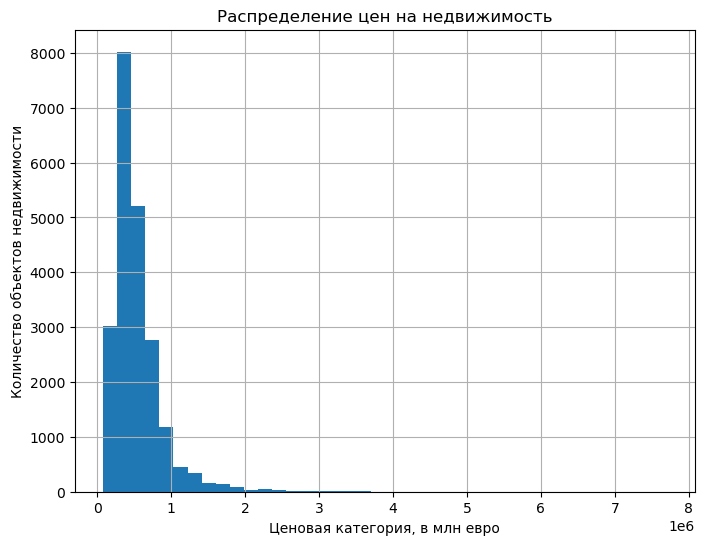

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

ax.hist(df.price, bins=40)
ax.grid(True)
plt.title('Распределение цен на недвижимость')
plt.xlabel('Ценовая категория, в млн евро')
plt.ylabel('Количество объектов недвижимости');

#### Ограничим выбросы (возьмем стоимость домов до 3 млн евро):

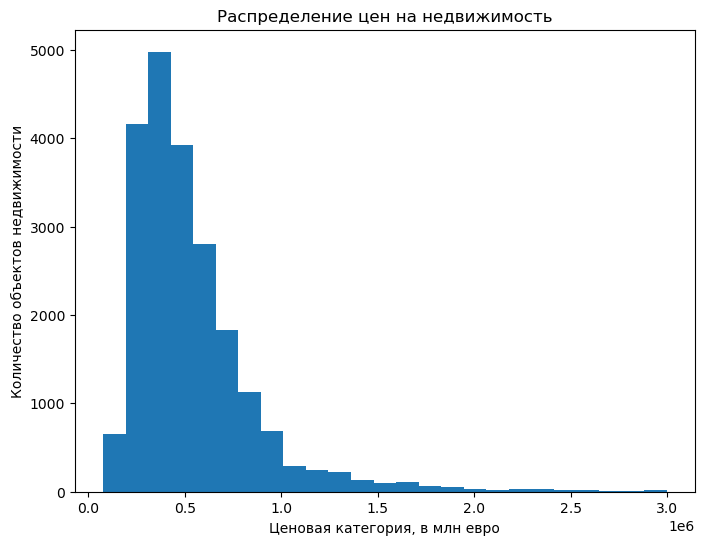

In [5]:
plt.figure(figsize=(8,6))

plt.hist(df.price[df.price < 3000000], bins=25)
plt.title('Распределение цен на недвижимость')
plt.xlabel('Ценовая категория, в млн евро')
plt.ylabel('Количество объектов недвижимости');

#### Судя по графику, наибольшее число объектов недвижимости имеют стоимость около 400 тыс евро. Статистические данные (mean в таблице выше) искажены из-за большого количества выбросов.

### 1.3 Изучите распределение квадратуры жилой площади


In [6]:
df.agg({'sqft_lot': ['min', 'mean', 'max']}).style.format(precision=0, thousands=' ')

,sqft_lot
min,520
mean,15 107
max,1 651 359


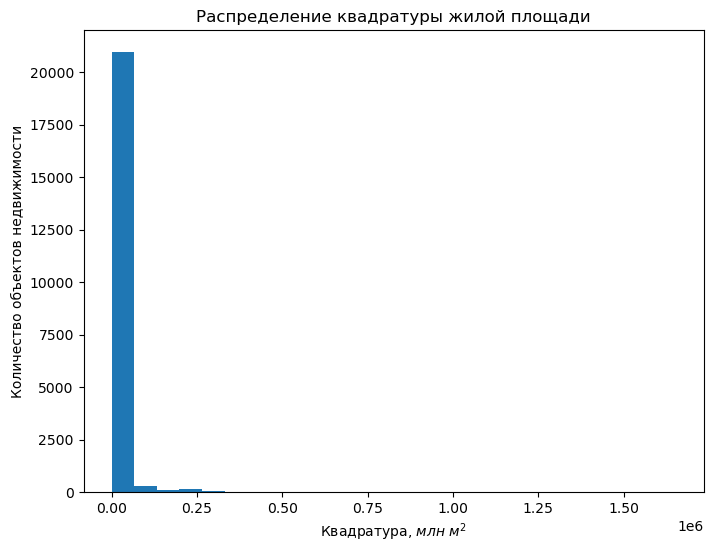

In [7]:
plt.figure(figsize=(8,6))

plt.hist(df.sqft_lot, bins=25)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel(r'Квадратура, $млн$ $м^2$')
plt.ylabel('Количество объектов недвижимости');

#### Опять же, видим большое количество выбросов, и график почти ни о чем не говорит. Поэтому ограничим площадь недвижимости 100 000 квадратных метров.

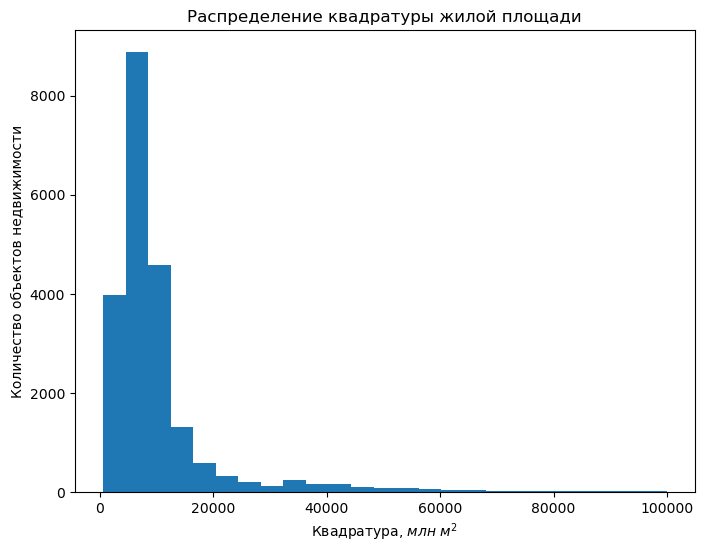

In [8]:
plt.figure(figsize=(8,6))

plt.hist(df.sqft_lot[df.sqft_lot < 100000], bins=25)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel(r'Квадратура, $млн$ $м^2$')
plt.ylabel('Количество объектов недвижимости');

#### Становится лучше видно, что большая часть объектов недвижимости приходится на объекты с площадью около 8-10 тыс квадратных метров. Статистическое среднее (15 000 метров квадртаных) сильно искажено имеющимися в выборке выбросами.

### 1.4 Изучите распределение года постройки


In [9]:
df.agg({'yr_built': ['min', 'mean', 'max']}).style.format(precision=0, thousands=' ')

,yr_built
min,1 900
mean,1 971
max,2 015


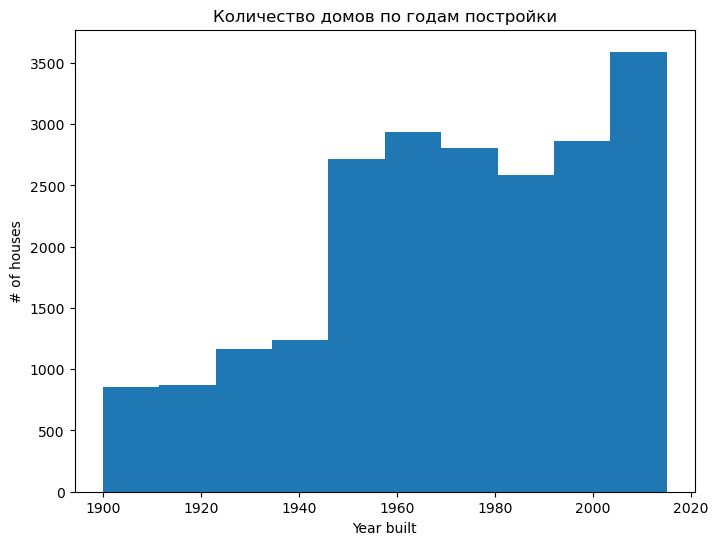

In [10]:
plt.figure(figsize=(8,6))

plt.hist(df.yr_built)
plt.title('Количество домов по годам постройки')
plt.xlabel('Year built')
plt.ylabel('# of houses');

#### Посмотрим в другом виде (scatterplot)

In [11]:
yr_c = pd.DataFrame(df.yr_built.value_counts()).sort_index()
yr_c

,yr_built
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201
2014,559


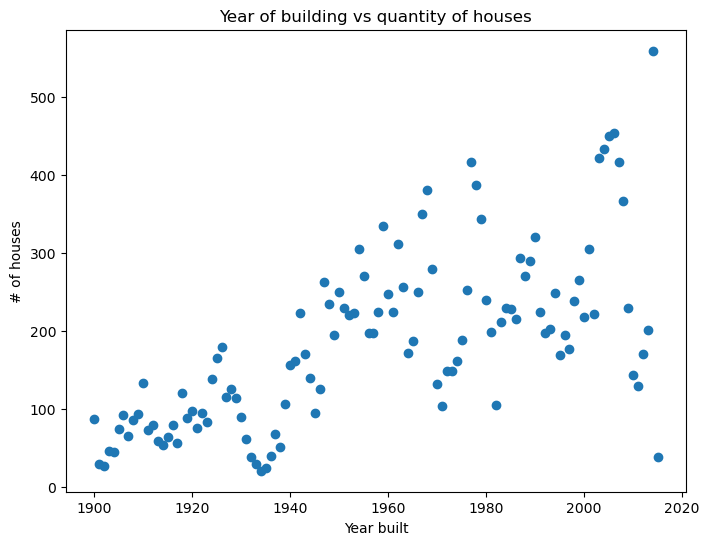

In [12]:
plt.figure(figsize=(8,6))

plt.scatter(yr_c.index, yr_c.yr_built)
plt.title('Year of building vs quantity of houses')
plt.xlabel('Year built')
plt.ylabel('# of houses');

#### Распределение количества домов по годам постройки можно задать линейной функцией. Необходимо при этом ограничить выборку, исключить последние 10-15 лет, когда дисперсия становится хаотичной.

## Задание 2
### 2.1 Изучите распределение домов от наличия вида на набережную

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Посмотрим, какой процент домов имеют вид на набережную.

In [14]:
data2 = pd.DataFrame(df.waterfront.value_counts(normalize=True)*100)
data2.rename(index={0: 'No', 1: 'Yes'}, inplace=True)
data2.style.format(precision=1)

,waterfront
No,99.2
Yes,0.8


#### Используем boxplot для дальнейшего анализа цены:

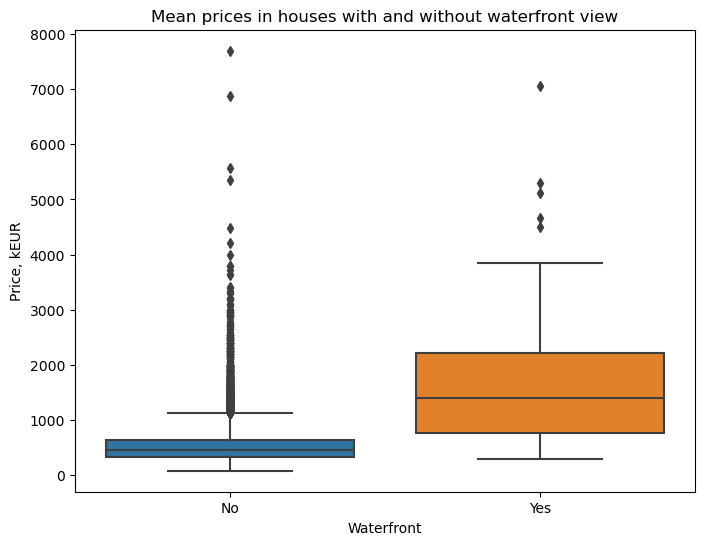

In [15]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df.waterfront, y=df.price/1000)
plt.ylabel('Price, kEUR')
plt.xlabel('Waterfront')

plt.xticks(ticks=[0, 1], labels=['No','Yes'])
plt.title('Mean prices in houses with and without waterfront view');

#### Распределение домов в зависимости от вида на набережную следующее: только 0.8 % всех объектов имеют вид. Подавляющее количество домов вида на набережную не имеют.

#### Наличие вида на набережную значительно поднимает цену жилья (шок-контент). 

Так, среднее значение становится 1.3 млн евро (500 тыс без вида). 

Рассматривая цены на недвижимость с видом на набережную, мы наблюдаем, что 99,7% всех значений цены лежат в пределах 4 млн евро. 

В случае, когда вида на набережную нет, 99,7% всех таких объектов имеют цену ниже 1.2 млн евро. 

### 2.2 Изучите распределение этажей домов

In [16]:
data3 = pd.DataFrame(df.floors.value_counts().reset_index().rename(columns={'floors': 'Houses', 'index': 'Floors'}).set_index('Floors'))
data3 = data3.sort_index()
data3

,Houses
Floors,
1.0,10680
1.5,1910
2.0,8241
2.5,161
3.0,613
3.5,8


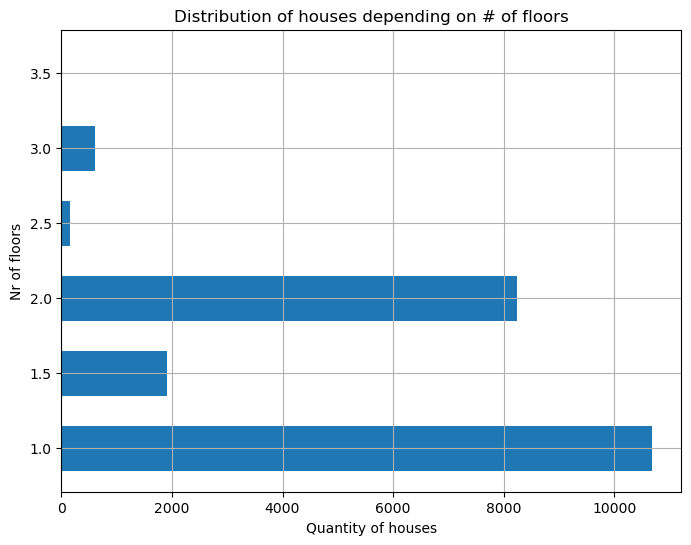

In [17]:
plt.figure(figsize=(8, 6))

plt.barh(data3.index, data3.Houses, height = 0.3)
plt.grid()
plt.xlabel('Quantity of houses')
plt.ylabel('Nr of floors')
plt.title('Distribution of houses depending on # of floors');

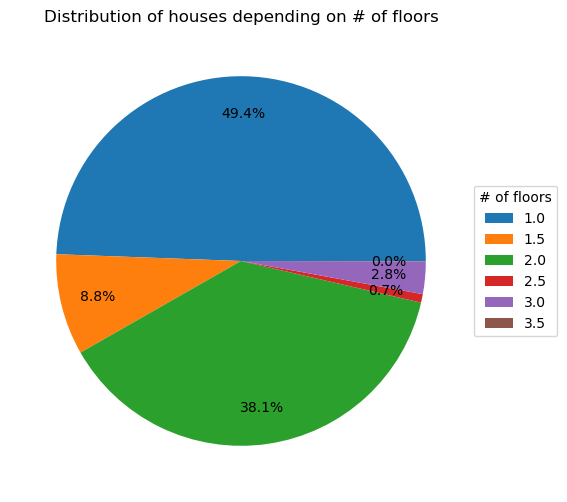

In [18]:
plt.rcdefaults

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

ax.pie(data3.Houses, autopct='%1.1f%%', pctdistance=0.8)
ax.set_title('Distribution of houses depending on # of floors')
ax.legend(data3.index,
          loc="center right",
          bbox_to_anchor=(0.7, 0, 0.5, 1),
         title='# of floors')
plt.show;

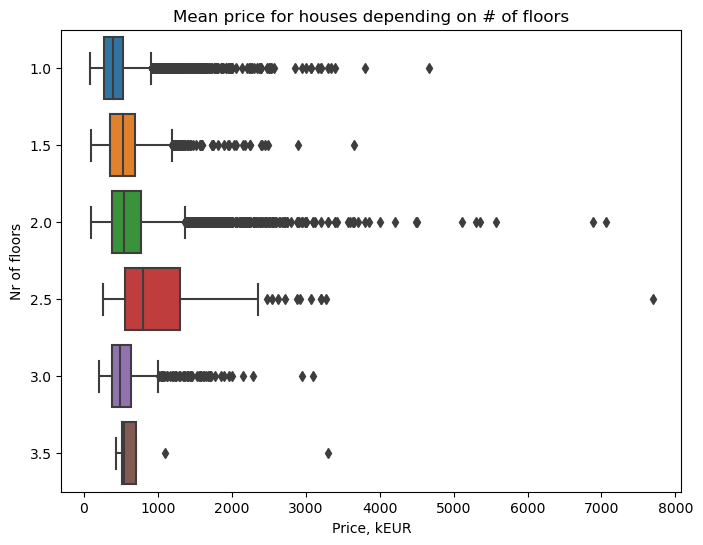

In [19]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df.price/1000, y=df.floors, whis=1.5, orient='h')
plt.xlabel('Price, kEUR')
plt.ylabel('Nr of floors')
plt.title('Mean price for houses depending on # of floors');

#### Больше всего домов в выборке имеют этажность 1 или 2 этажа.

#### Средняя цена домов растет в зависимости от количества этажей до отметки 2.5 этажа.
Так, у домов с 1 этажом средняя стоимость составляет 400 тыс евро, у домов с 1.5 этажами - уже 600 тыс евро.

- Дома с 2.5 этажами имеют среднюю стоиость порядка 800 тыс евро, и 99,7% домов имеют стоимость в интервале (300; 2 300) тыс евро.

- Однако, 3-этажные и 3,5-этажные дома показывают откат в средней цене - до 500 тыс евро. 


>Необходимо принять во внимание, что выборки домов с этажностью 2.5 и 3.5 с большой долей вероятности нерепрезентативны, так как имеют относительно немного домов (161 и 8 соответственно).
Выборка по домам с этажностью в 3 этажа тоже малорепрезентативна (имеет 613 домов, что относительно мало).


Необходимо дальнейшее исследование аномалии в скачке средней цены. Возможные причины: год постройки, состояние, местонахождение (район города), наличие вида.

### Изучите распределение состояния домов

In [20]:
data5 = pd.DataFrame(df.condition.value_counts(normalize='condition').reset_index()
                     .rename(columns={'condition': 'Houses_share', 'index': 'Condition'}).set_index('Condition'))
data5 = data5.sort_index()
(data5*100).style.format(precision=2)

,Houses_share
Condition,
1,0.14
2,0.80
3,64.92
4,26.28
5,7.87


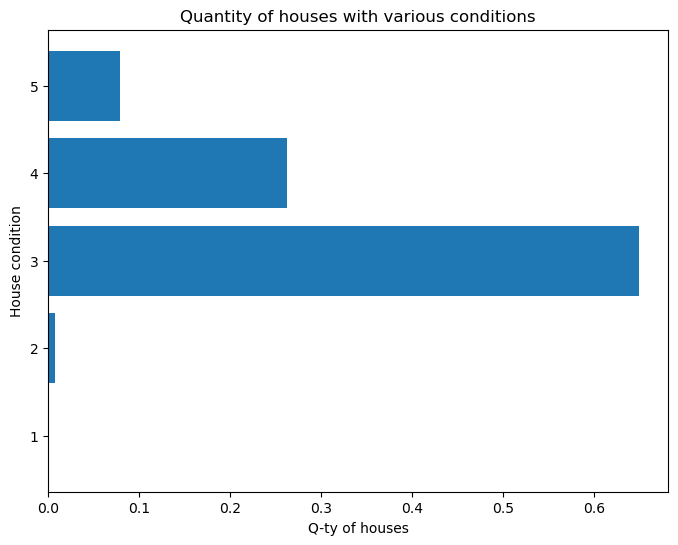

In [21]:
plt.figure(figsize=(8, 6))

plt.barh(data5.index, data5.Houses_share)
plt.title('Quantity of houses with various conditions')
plt.xlabel('Q-ty of houses')
plt.ylabel('House condition');

#### Большинство домов Сиэттла в удовлетворительном состоянии (65%), 26% - в хорошем состоянии, и 8% - в отличном. Домов в состоянии "2" и "1" очень мало - в сумме меньше 1%.

## Задание 3
### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


#### Начнем с построения матрицы корреляции.

In [22]:
corr_matrix = np.round(df.corr(), 1)
corr_matrix[corr_matrix.abs() < 0.25] = 0

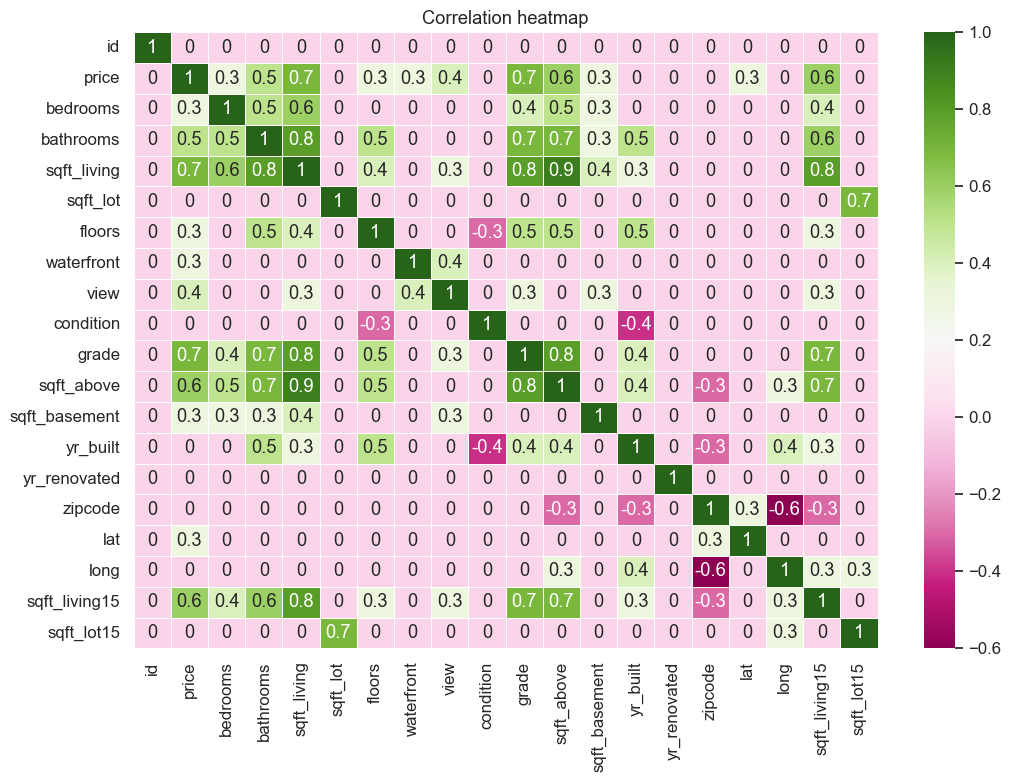

In [23]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.1)
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='PiYG')
plt.title('Correlation heatmap');

In [24]:
corr_matrix2 = corr_matrix[corr_matrix.index == 'price'].copy()
corr_matrix2 = corr_matrix2.transpose()

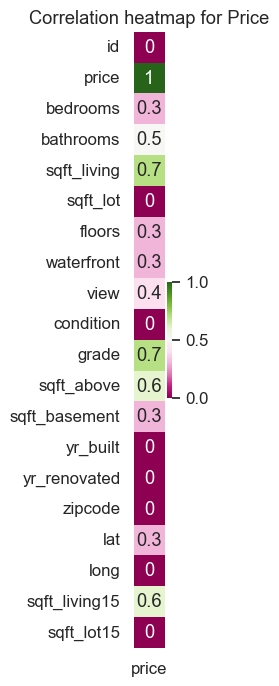

In [25]:
plt.figure(figsize=(0.5,8))
sns.set(font_scale=1.1)
sns.heatmap(corr_matrix2, annot=True, cmap='PiYG')
plt.title('Correlation heatmap for Price');

Описание признаков базы взято из источника:

https://dev.to/upwardtrajectory/engineering-location-features-with-haversine-s-formula-for-prediction-modeling-23n2

#### Таким образом, видим, что сильную прямую зависимость с ценой показывают (по степени корреляции):

- Общая площадь дома (0,7)

- Оценка дома (0.7)

- Средняя площадь дома у ближайших 15 соседей участка (0.6)

- Площадь дома без учета подвала (0.6)

- Количество санузлов (0.5)

- Наличие вида (0.4)


Значительной отрицательной корреляции не установлено.

### 3.1 Зависимость цены от общей площади дома

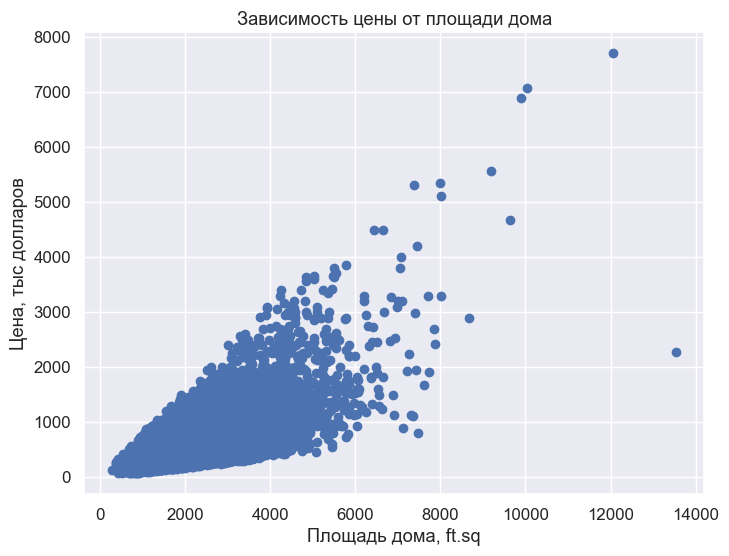

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(df.sqft_living, df.price/1000)
plt.title('Зависимость цены от площади дома')
plt.xlabel('Площадь дома, ft.sq')
plt.ylabel('Цена, тыс долларов');

#### Уберем выбросы, оставим дома с площадью менее 8 тыс кв футов.

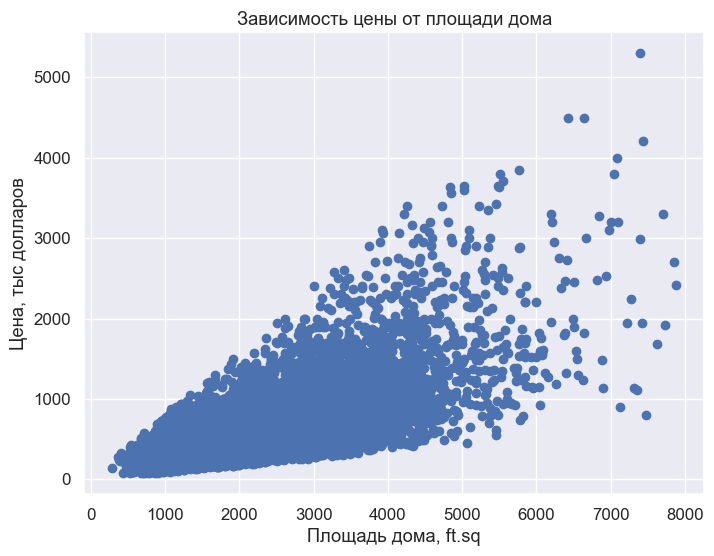

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(df.sqft_living[df.sqft_living < 8000], df.price[df.sqft_living < 8000]/1000)
plt.title('Зависимость цены от площади дома')
plt.xlabel('Площадь дома, ft.sq')
plt.ylabel('Цена, тыс долларов');

#### Можно с уверенностью утверждать, что есть сильная линейная зависимость цены от площади дома. Можно смело оперировать таким понятием как стоимость на 1 кв фута дома. 
#### Построим модель:

In [28]:
x1 = np.array(df.sqft_living[df.sqft_living < 8000])
y1 = np.array(df.price[df.sqft_living < 8000])
x1, y1

(array([1180, 2570,  770, ..., 1020, 1600, 1020], dtype=int64),
 array([221900., 538000., 180000., ..., 402101., 400000., 325000.]))

In [29]:
model1 = LinearRegression()
x1_r = x1.reshape(-1, 1)
mod1 = model1.fit(x1_r, y1)
mod1.intercept_, mod1.coef_[0]

(-23992.143301960896, 270.65417317822914)

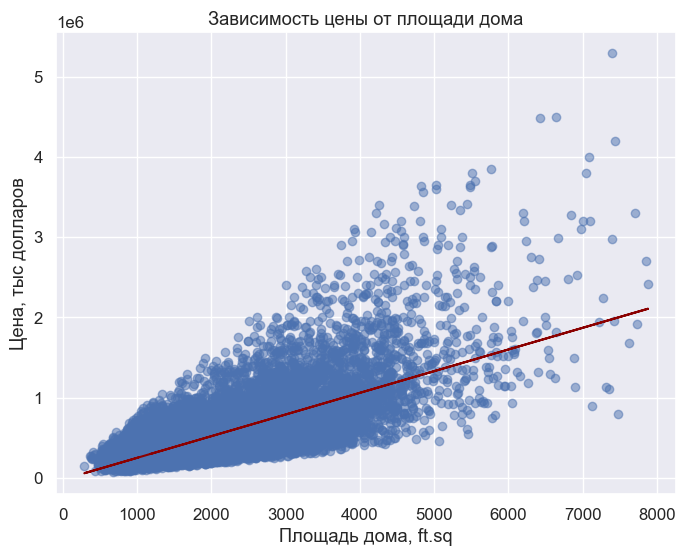

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(df.sqft_living[df.sqft_living < 8000], df.price[df.sqft_living < 8000], alpha=0.5)
plt.plot(x1, (mod1.intercept_ + mod1.coef_[0]*x1), color='darkred')
plt.title('Зависимость цены от площади дома')
plt.xlabel('Площадь дома, ft.sq')
plt.ylabel('Цена, тыс долларов');

#### Таким образом, стоимость каждого дополнительного квадратного фута жилья составляет в среднем 270 долларов.

### 3.2 Зависимость цены от оценки дома

Оценим по таблице количество домов с разной оценкой экспертов:

In [31]:
data4 = pd.DataFrame(df.grade.value_counts()).sort_index()
data4

,grade
1,1
3,3
4,29
5,242
6,2038
7,8981
8,6068
9,2615
10,1134
11,399


Набросаем гистограмму по оценкам:

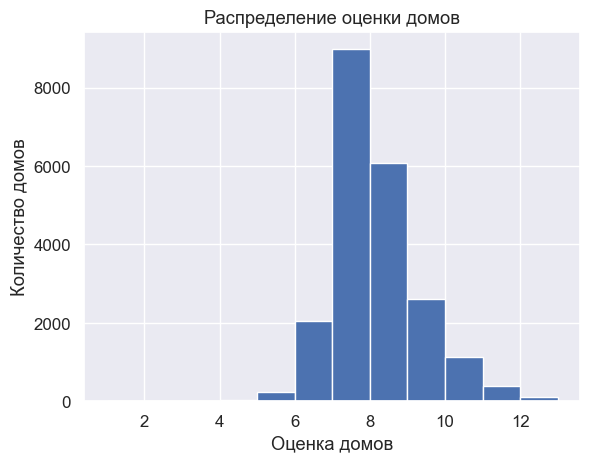

In [32]:
plt.hist(df.grade, bins=12)
plt.title('Распределение оценки домов')
plt.xlabel('Оценка домов')
plt.ylabel('Количество домов');

Визуально похоже, что оценки домов имеют близкое к нормальному распределение.

#### Посмотрим на среднюю цену и дисперсию в зависимости от оценки дома:

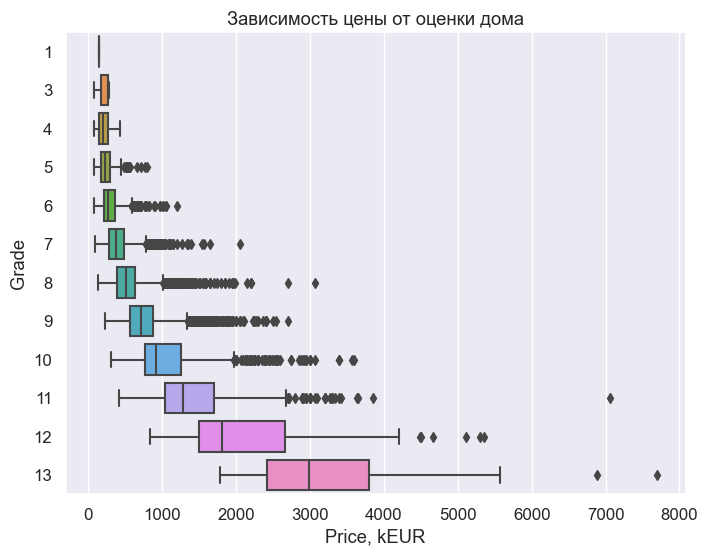

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df.grade, x=df.price/1000, whis=1.5, orient='h')
plt.title('Зависимость цены от оценки дома')
plt.xlabel('Price, kEUR')
plt.ylabel('Grade');

In [34]:
data4a = df.groupby('grade').agg({'price': 'mean'}).sort_index()
data4a.style.format(precision=0, thousands=' ')

,price
grade,
1,142 000
3,205 667
4,214 381
5,248 524
6,301 920
7,402 590
8,542 853
9,773 513
10,1 071 771


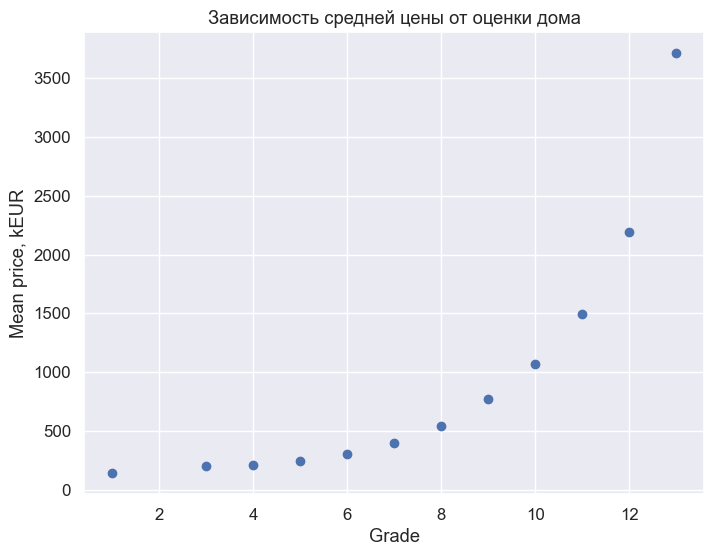

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(data4a.index, data4a.price/1000)
plt.title('Зависимость средней цены от оценки дома')
plt.ylabel('Mean price, kEUR')
plt.xlabel('Grade');

#### Есть четкая нелинейная зависимость цены от оценки дома.
Попробуем видоизменить данные. Опытным путем находим, что оценка дома в 4 степени показывает линейную зависимость с ценой.

Для этих данных уже можно построить линейную модель. Но необходимо убрать выбросы в самой лучшей категории. Ограничим цену 3 млн евро.

In [36]:
data4b = df[df.price < 3000000].groupby('grade').agg({'price': 'mean'}).sort_index()
data4b.style.format(precision=0, thousands=' ')

,price
grade,
1,142 000
3,205 667
4,214 381
5,248 524
6,301 920
7,402 590
8,542 436
9,773 513
10,1 057 987


In [37]:
data4c = pd.DataFrame(df.grade[df.price < 3000000].value_counts()).reset_index().rename(columns={'grade': '# of houses', 'index':'grade'}).set_index('grade').sort_index()

In [38]:
pd.concat([data4b, data4c], axis=1).style.format(precision=0, thousands=' ')

,price,# of houses
grade,,
1,142 000,1
3,205 667,3
4,214 381,29
5,248 524,242
6,301 920,2 038
7,402 590,8 981
8,542 436,6 067
9,773 513,2 615
10,1 057 987,1 127


Выборка уменьшилась не слишком сильно. Можно продолжить анализ.

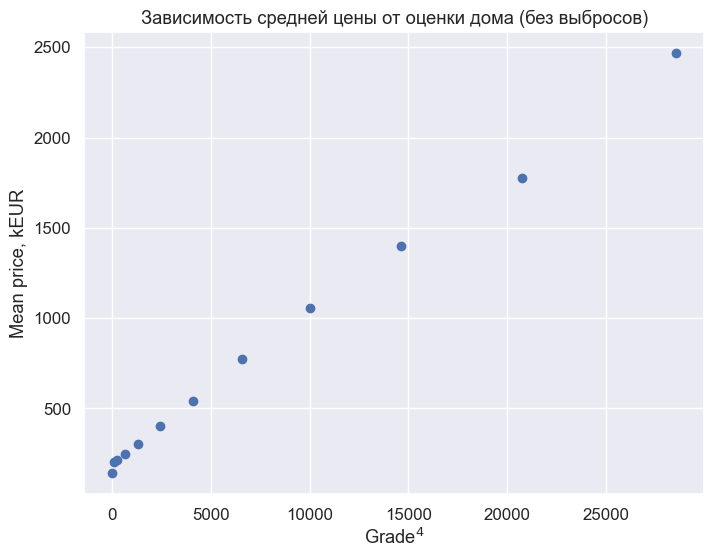

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(data4b.index**4, data4b.price/1000)
plt.title('Зависимость средней цены от оценки дома (без выбросов)')
plt.ylabel('Mean price, kEUR')
plt.xlabel(r'Grade$^4$');

In [40]:
x2 = np.array(data4b.index**4)
x2

array([    1,    81,   256,   625,  1296,  2401,  4096,  6561, 10000,
       14641, 20736, 28561], dtype=int64)

In [41]:
y2 = np.array(data4b.price)
y2

array([ 142000.        ,  205666.66666667,  214381.03448276,
        248523.97107438,  301919.6373896 ,  402590.26233159,
        542436.22581177,  773513.18585086, 1057987.04347826,
       1397172.76052632, 1775348.35616438, 2467142.85714286])

#### Подсчитаем коэффициенты зависимости:

In [42]:
model2 = LinearRegression()
x2_r = x2.reshape(-1, 1)
mod2 = model2.fit(x2_r, y2)
mod2.intercept_, mod2.coef_[0]

(205140.22804656497, 79.177628865169)

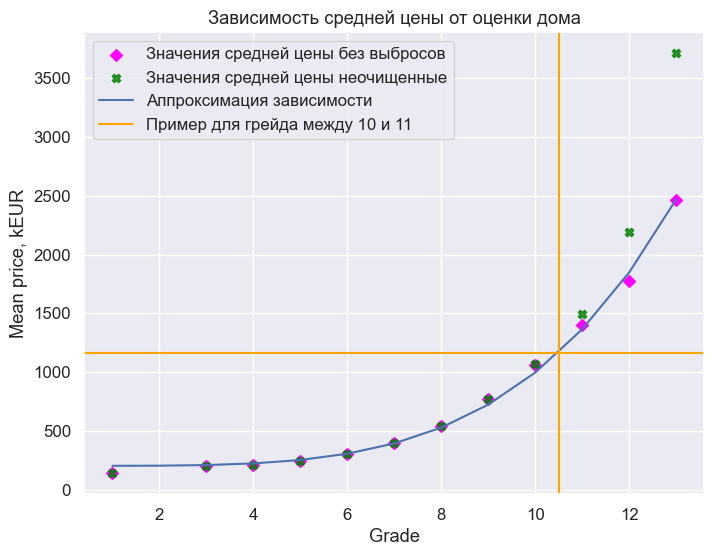

In [73]:
x_axis = np.arange(round(min(data4b.index)), round(max(data4b.index)+1), 1)

plt.figure(figsize=(8,6))
plt.scatter(data4b.index, data4b.price/1000, c='Magenta', marker='D')
plt.scatter(data4a.index, data4a.price/1000, c='green', marker='X', alpha=0.8)
plt.plot(x_axis, (mod2.intercept_+mod2.coef_[0]*(x_axis**4))/1000)
plt.axvline(10.5, c='orange')
plt.axhline((mod2.intercept_+mod2.coef_[0]*(10.5**4))/1000, c='orange')
plt.title('Зависимость средней цены от оценки дома')
plt.ylabel('Mean price, kEUR')
plt.xlabel(r'Grade')
plt.legend(['Значения средней цены без выбросов', 'Значения средней цены неочищенные', 'Аппроксимация зависимости', 'Пример для грейда между 10 и 11']);

Исходя из этих данных можно предположить цену дома, если, например, дом находится между двумя грейдами по состоянию. 

Например, дом с оценкой между 10 и 11 (10.5) - предположительно должен иметь стоимость в районе 1.2 млн евро. Отмечен оранжевыми линиями на графике.

#### Следующие показатели скорее всего будут показывать сильную корреляцию с общей площадью дома, анализ которой был сделан выше.:
- Средняя площадь дома у ближайших 15 соседей участка (0.6)

- Площадь дома без учета подвала (0.6)

- Количество санузлов (0.5)

#### Проанализируем наличие вида. Прежде всего посмотрим, сколько домов попадает в каждую из категорий:

In [44]:
data6 = pd.DataFrame(df.view.value_counts(normalize=True).reset_index().rename(columns={'view': 'Houses_share', 'index':'View'}).set_index('View')).sort_index()
(data6*100).style.format(precision=1)

,Houses_share
View,
0,90.2
1,1.5
2,4.5
3,2.4
4,1.5


Видим, что 90% домов не имеют вида совсем или практически (0).

#### Посмотрим, есть ли зависимость этого показателя от вида на набережную.

In [45]:
data6 = pd.crosstab(df.view, df.waterfront)
data6

waterfront,0,1
view,,
0,19489,0
1,331,1
2,955,8
3,491,19
4,184,135


Практически все дома с видом на набережную имеют лучшую (4) или близкую к наилучшей (3) оценку вида.

#### Построим зависимость цены от наличия вида:

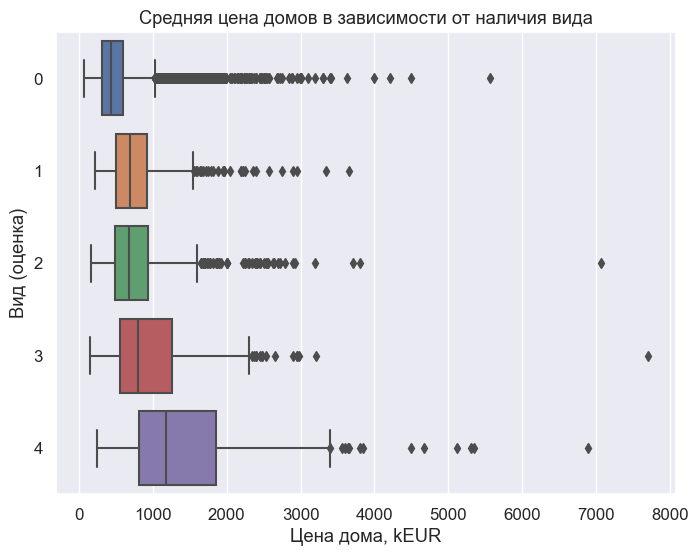

In [46]:
plt.figure(figsize=(8, 6))

sns.boxplot(y=df.view, x=df.price/1000, orient='h')
plt.xlabel('Цена дома, kEUR')
plt.ylabel('Вид (оценка)')

plt.title('Средняя цена домов в зависимости от наличия вида');

#### Существует сильная зависимость цены на дом в зависимости от наличия вида. При этом категории 1 и 2 практически не отличаются

In [47]:
data6 = df.groupby('view').agg({'price': 'mean'}).sort_index()
data6.style.format(precision=0, thousands=' ')

,price
view,
0,496 564
1,812 281
2,792 401
3,971 965
4,1 463 711


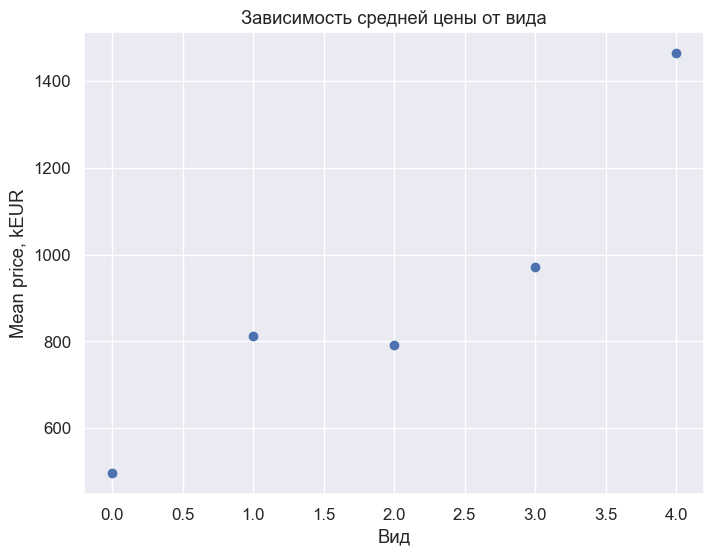

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(data6.index, data6.price/1000)
plt.title('Зависимость средней цены от вида')
plt.ylabel('Mean price, kEUR')
plt.xlabel('Вид');

#### Теперь попробуем объединить категории 1 и 2. Сначала проверим распределение домов по типам вида, и проверим тип данных.

In [49]:
slice1 = df[['view', 'price']].copy()
slice1

,view,price
0,0,221900.0
1,0,538000.0
2,0,180000.0
3,0,604000.0
4,0,510000.0
...,...,...
21608,0,360000.0
21609,0,400000.0
21610,0,402101.0
21611,0,400000.0


In [50]:
slice1.view.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: view
Non-Null Count  Dtype
--------------  -----
21613 non-null  int64
dtypes: int64(1)
memory usage: 169.0 KB


#### Так как тип - integer, а мы планируем создать промежуточную категорию 1.5, нужно поменять тип на float.

In [51]:
slice1.view = slice1.view.astype('float')
slice1.view.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: view
Non-Null Count  Dtype  
--------------  -----  
21613 non-null  float64
dtypes: float64(1)
memory usage: 169.0 KB


In [52]:
slice1.view.replace({1: 1.5, 2: 1.5}, inplace=True)
slice1.view.value_counts().sort_index()

0.0    19489
1.5     1295
3.0      510
4.0      319
Name: view, dtype: int64

In [53]:
data7 = slice1.groupby('view').agg({'price': 'mean'}).sort_index()
data7.style.format(precision=0, thousands=' ')

,price
view,
0.000000,496 564
1.500000,797 498
3.000000,971 965
4.000000,1 463 711


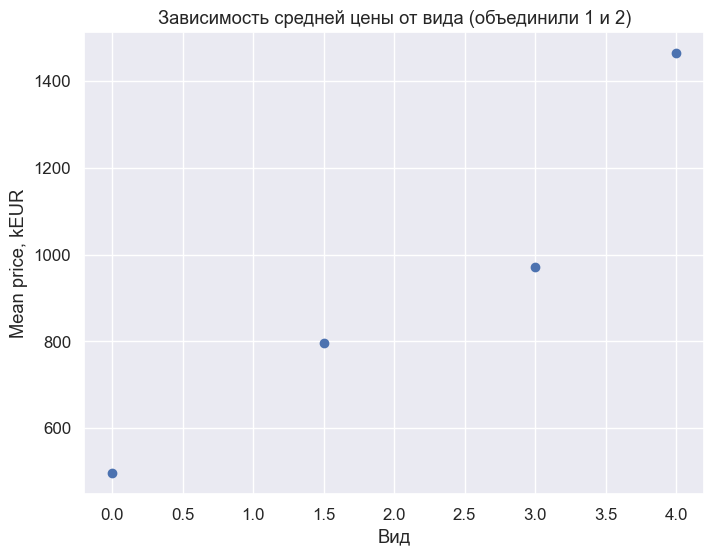

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(data7.index, data7.price/1000)
plt.title('Зависимость средней цены от вида (объединили 1 и 2)')
plt.ylabel('Mean price, kEUR')
plt.xlabel('Вид');

#### Похоже, что цена и вид имеют квадратичную зависимость. Попробуем возвести вид в квадрат

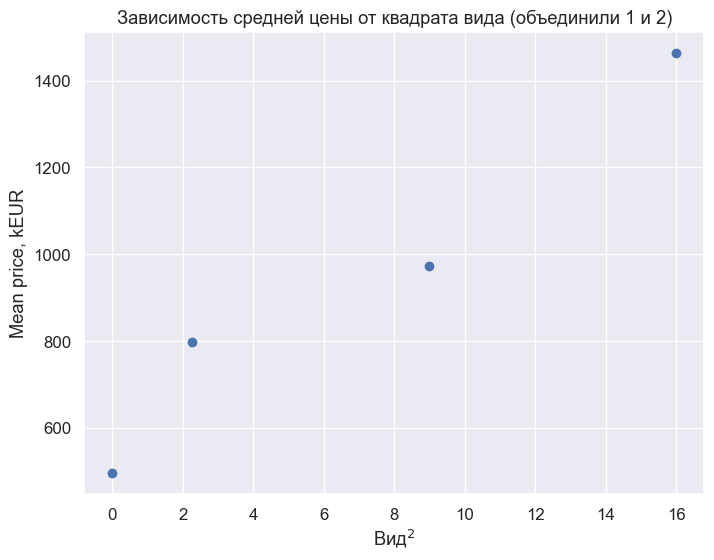

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(data7.index**2, data7.price/1000)
plt.title('Зависимость средней цены от квадрата вида (объединили 1 и 2)')
plt.ylabel('Mean price, kEUR')
plt.xlabel('Вид$^2$');

#### Теперь можно построить линейную зависимость цены от вида в квадрате (учитываем, что категории 1 и 2 объединены)

In [56]:
x3 = np.array(slice1.view**2)
y3 = np.array(slice1.price)

In [57]:
model3 = LinearRegression()
x3_r = x3.reshape(-1, 1)
mod3 = model3.fit(x3_r, y3)
mod3.intercept_, mod3.coef_[0]

(504533.84318135784, 60949.42042167022)

Построим график и вернемся к первоначальным категориям вида:

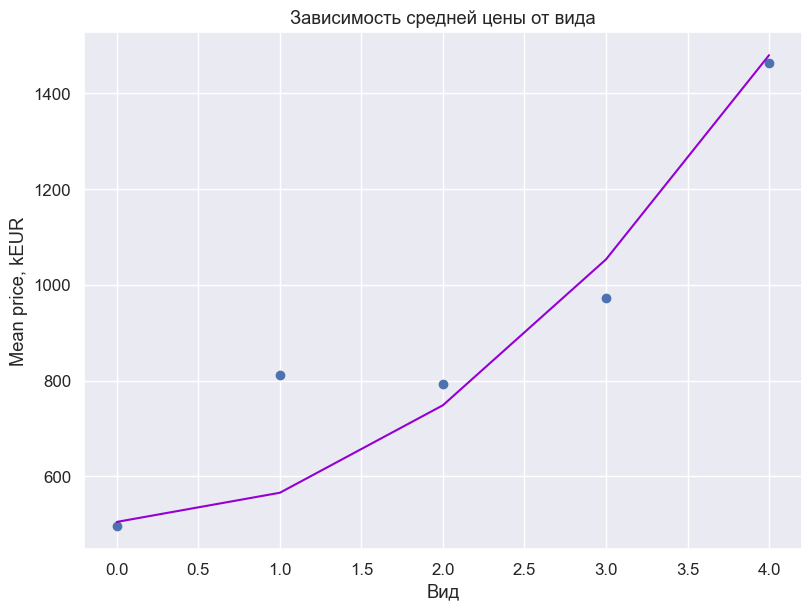

In [58]:
fig, ax = plt.subplots(layout='constrained', figsize=(8,6))

ax.scatter(data6.index, data6.price/1000)
ax.plot(data6.index, (mod3.intercept_ + mod3.coef_[0]*data6.index**2)/1000, c='darkviolet')

ax.set_title('Зависимость средней цены от вида')
ax.set_ylabel('Mean price, kEUR')
ax.set_xlabel('Вид');

#### Исходя из полученной модели дома с видом "1" требуют пересмотра. 

Возможно, некоторые дома относятся к категории вида "2". Еще одна гипотеза, что дома этого вида переоценены.